</br>
</br></br>

## Εργασια  - Αναγνώριση Προτύπων και Μηχανική Μάθηση

## Φοιτητης - ΠΑΝΑΓΙΩΤΗΣ ΚΟΝΤΟΣ   mpsp2215

</br></br></br>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Load the .npy file
# data = np.load('Dataset.npy')
data = np.load('data/Dataset.npy')
# data = data[0:100000]
print(data)

['ur4592644,tt0120884,10,16 January 2005'
 'ur3174947,tt0118688,3,16 January 2005'
 'ur3780035,tt0387887,8,16 January 2005' ...
 'ur4592639,tt0107423,9,16 January 2005'
 'ur4581944,tt0102614,8,16 January 2005'
 'ur1162550,tt0325596,7,16 January 2005']


In [7]:
# Manipulate the data into a dataframe
df = pd.DataFrame([x.split(',') for x in data], columns=['User_ID', 'Movie_ID', 'Rating', 'Date'])
print(df)

           User_ID   Movie_ID Rating             Date
0        ur4592644  tt0120884     10  16 January 2005
1        ur3174947  tt0118688      3  16 January 2005
2        ur3780035  tt0387887      8  16 January 2005
3        ur4592628  tt0346491      1  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
...            ...        ...    ...              ...
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005
4669817  ur4592639  tt0107423      9  16 January 2005
4669818  ur4581944  tt0102614      8  16 January 2005
4669819  ur1162550  tt0325596      7  16 January 2005

[4669820 rows x 4 columns]


### Exploratory Data Analysis

In [8]:
# Get unique users, movies

unique_users = df['User_ID'].unique()
print("Unique Users ",len(unique_users))

unique_users = df['Movie_ID'].unique()
print("Unique Movies ",len(unique_users))

unique_users = df['Rating'].unique()
print("Unique Ratings ",len(unique_users))

dates = df['Date'].unique()
print("Unique Dates ",len(dates))

Unique Users  1499238
Unique Movies  351109
Unique Ratings  10
Unique Dates  8028


In [9]:
# Get users that have more than 100 ratings and 1500 ratings
Rmin = 100
Rmax = 1500

# Count the frequency of each user in the dataset
user_counts = df['User_ID'].value_counts()

# Filter the DataFrame to only include users that appear more than 100 times and less than 300
users_between_Rmin_and_Rmax = user_counts[(user_counts > Rmin) & (user_counts < Rmax)].index.tolist()

# Print the resulting list of users
print(users_between_Rmin_and_Rmax)


['ur23018536', 'ur25105932', 'ur6201371', 'ur2444068', 'ur34049683', 'ur44112735', 'ur4915915', 'ur6141756', 'ur67430579', 'ur23887409', 'ur34967775', 'ur0331289', 'ur44588015', 'ur4405474', 'ur13371508', 'ur34845698', 'ur29385135', 'ur0375636', 'ur4465293', 'ur0306861', 'ur27175177', 'ur0850869', 'ur20327151', 'ur0855231', 'ur1530907', 'ur1773414', 'ur46842921', 'ur66111139', 'ur1803589', 'ur56005872', 'ur3072427', 'ur7826013', 'ur3741220', 'ur28260582', 'ur57590728', 'ur1173088', 'ur20748638', 'ur3836774', 'ur18044142', 'ur1609079', 'ur0345596', 'ur0178741', 'ur25790270', 'ur8625456', 'ur2263198', 'ur0562732', 'ur2496397', 'ur0442119', 'ur13538926', 'ur34836174', 'ur19892892', 'ur32544613', 'ur0070535', 'ur26820801', 'ur1581184', 'ur20817083', 'ur2626332', 'ur8462477', 'ur2843647', 'ur0102677', 'ur94289145', 'ur57691865', 'ur13035875', 'ur45707659', 'ur5232724', 'ur4716150', 'ur53053227', 'ur1132073', 'ur3902771', 'ur59627333', 'ur0491610', 'ur0543054', 'ur1019294', 'ur17571044', 'ur

In [10]:
# Filter the DataFrame to only include users that appear more than 100 times and less than 1500
df_selected_users = df[df['User_ID'].isin(users_between_Rmin_and_Rmax)]
print(df_selected_users)

           User_ID   Movie_ID Rating             Date
1        ur3174947  tt0118688      3  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
8        ur3174947  tt0120601      8  16 January 2005
18       ur3174947  tt0182789      9  16 January 2005
26       ur3174947  tt0265086      8  16 January 2005
...            ...        ...    ...              ...
4669810  ur3174947  tt0103772      8  16 January 2005
4669813  ur0581842  tt0068424      4  16 January 2005
4669814  ur3174947  tt0096895      8  16 January 2005
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005

[818621 rows x 4 columns]


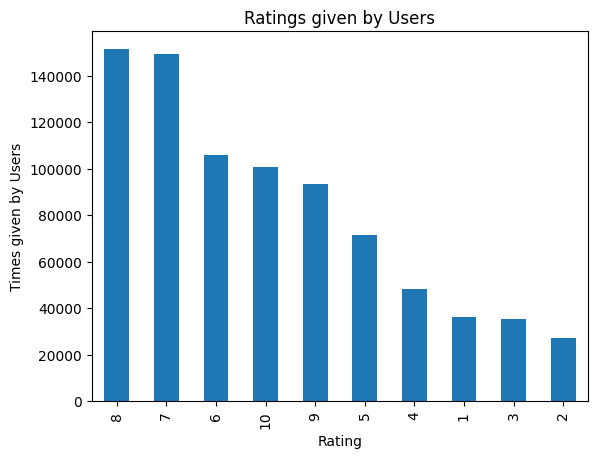

In [11]:
# count the number of occurrences of each rating
rating_counts = df_selected_users['Rating'].value_counts()

# plot a histogram
rating_counts.plot(kind='bar')
plt.title('Ratings given by Users')
plt.xlabel('Rating')
plt.ylabel('Times given by Users')
plt.show()

In [12]:
print(df_selected_users)
unique_ratings = df_selected_users['Rating'].unique()
print(unique_ratings)

           User_ID   Movie_ID Rating             Date
1        ur3174947  tt0118688      3  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
8        ur3174947  tt0120601      8  16 January 2005
18       ur3174947  tt0182789      9  16 January 2005
26       ur3174947  tt0265086      8  16 January 2005
...            ...        ...    ...              ...
4669810  ur3174947  tt0103772      8  16 January 2005
4669813  ur0581842  tt0068424      4  16 January 2005
4669814  ur3174947  tt0096895      8  16 January 2005
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005

[818621 rows x 4 columns]
['3' '8' '9' '10' '6' '2' '1' '7' '5' '4']


In [13]:
# Find the number of Ubique users?
# count the number of occurrences of each User
user_counts = df_selected_users['User_ID'].value_counts()
len(user_counts)

3007

/tmp/ipykernel_445440/3229571598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]


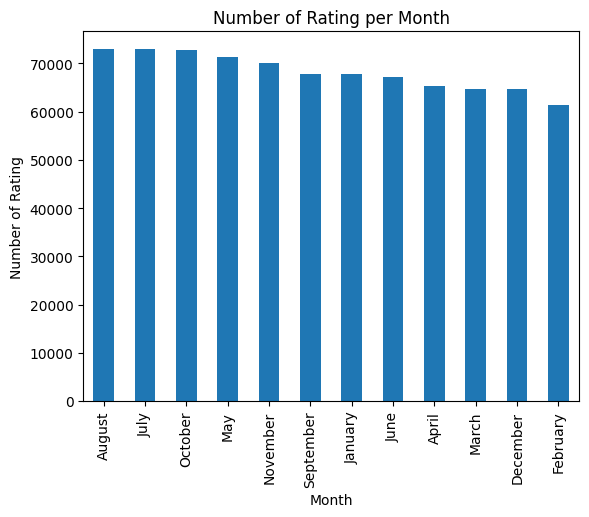

In [14]:
# Adding new column month
df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]
# print(df_selected_users)

month_counts = df_selected_users['Month'].value_counts()

# plot a histogram
month_counts.plot(kind='bar')
plt.title('Number of Rating per Month')
plt.ylabel('Number of Rating')
plt.xlabel('Month')
plt.show()

## Ενναλακτικη Αναπαρασταση Δεδομένων

In [13]:
df_grouped=df_selected_users
# drop duplicates
df_grouped = df_grouped.drop_duplicates(subset=['User_ID', 'Movie_ID'])
df_grouped

,User_ID,Movie_ID,Rating,Date,Month
1,ur3174947,tt0118688,3,16 January 2005,January
4,ur3174947,tt0094721,8,16 January 2005,January
8,ur3174947,tt0120601,8,16 January 2005,January
18,ur3174947,tt0182789,9,16 January 2005,January
26,ur3174947,tt0265086,8,16 January 2005,January
...,...,...,...,...,...
4669810,ur3174947,tt0103772,8,16 January 2005,January
4669813,ur0581842,tt0068424,4,16 January 2005,January
4669814,ur3174947,tt0096895,8,16 January 2005,January
4669815,ur0581842,tt0107977,6,16 January 2005,January


In [14]:
# pivot the table
R = df_grouped.pivot(index='User_ID', columns='Movie_ID', values='Rating')
R

Movie_ID,tt0000001,tt0000003,tt0000005,tt0000007,tt0000008,tt0000010,tt0000012,tt0000013,tt0000014,tt0000015,...,tt9913036,tt9913038,tt9913040,tt9913050,tt9913754,tt9914414,tt9914598,tt9915686,tt9916190,tt9916204
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0001220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0002746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0004646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur9972457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur99782462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur99809306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop movies that are rated by 50 users at least
counts = R.count()
threshold = 50
filtered_df = R.loc[:, counts >= threshold]
print(filtered_df.shape)

(3007, 2974)


In [17]:
R = filtered_df

In [18]:
# drop columns where all values are NaN
R = R.dropna(axis=1, how='all')

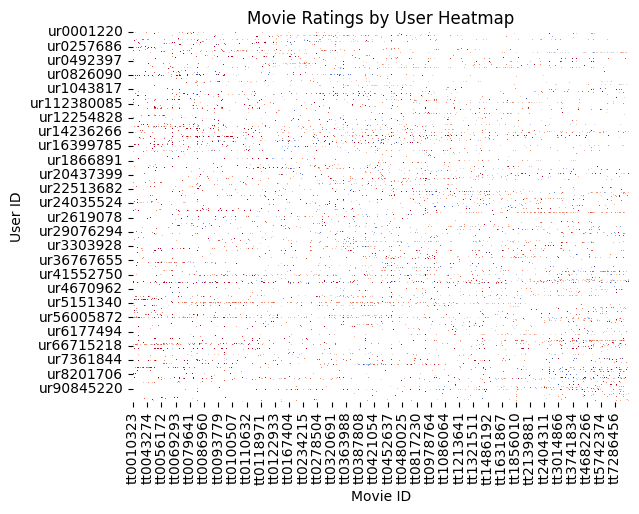

In [19]:
# Visualising our data, we will plot a heatmap but we can't see a lot!
R_numeric = R.apply(pd.to_numeric)
sns.heatmap(R_numeric, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

In [20]:
R.shape

(3007, 2974)

In [21]:
# replace missing values with 0
R.fillna(0, inplace=True)
R

Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9072352,tt9086228,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0001220,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0002746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0003136,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0003696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0004646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur9972457,0,8,0,9,0,0,8,9,0,0,...,0,0,0,0,0,0,0,0,0,0
ur99782462,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,5,0
ur99809306,0,0,0,0,0,0,0,0,0,0,...,0,4,5,0,0,0,0,0,0,0


## Doing the clustering

In [22]:
# normalize the data
# df_norm = (R - R.mean()) / R.std()
df_norm = R

### Use euclidiean distance with K-means

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/panos/.local/lib/python3.10/si

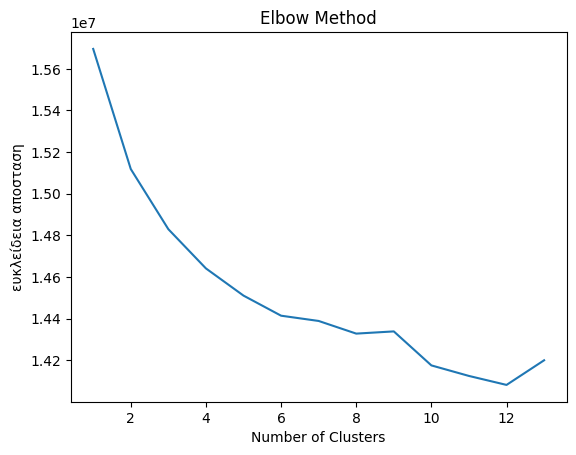

In [23]:
# Determine the optimal number of clusters using the elbow method
ssd = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(df_norm)
    ssd.append(kmeans.inertia_)
    
# Plot the SSD vs. the number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 14), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ευκλείδεια αποσταση')
plt.show()

In [24]:
# cluster the users using k-means
# best number is 12 but we will take 4 for easier visuallization and more dense clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_norm)

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    2324
2     303
1     258
3     122
Name: cluster, dtype: int64


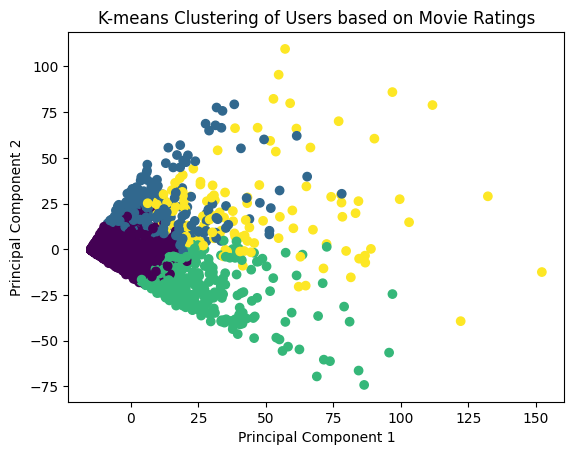

In [26]:
# add the cluster labels to the dataframe
R['cluster'] = clusters

# print the number of users in each cluster
print(R['cluster'].value_counts())

# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_norm)

# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()


</br>
<h3>It seems visually that we have some teams of users that we will now visualise to get some insigths</h3>
</br>


In [101]:
# Lets create some of our teams
R = R.apply(pd.to_numeric)
UA = R[R['cluster'] == 1]
UB = R[R['cluster'] == 0]
UC = R[R['cluster'] == 2]
UD = R[R['cluster'] == 3]

In [102]:
UD

Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9086228,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,cluster
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0225436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0345596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0375636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0489763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0491610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur87850731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur90766933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur91222832,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,3


In [62]:
UC

Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9086228,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,cluster
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0002746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ur0035229,0,0,0,0,0,0,10,0,10,0,...,0,0,0,0,0,0,0,0,0,2
ur0064493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ur0068788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ur0070535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur98033888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
ur98906416,7,4,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,2
ur9972457,0,8,0,9,0,0,8,9,0,0,...,0,0,0,0,0,0,0,0,0,2


In [103]:
# Make our sparse array more dense 
# Drop all columns where every value is 0 
UC = UC.drop(UC.columns[(UC == 0).all()], axis=1)

</br>


## Now we will explore our data with some visualisation techniques



</br>


## USER GROUP C

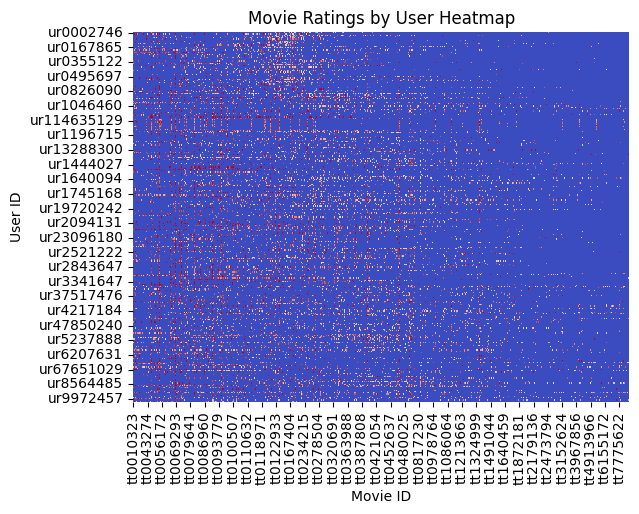

In [104]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UC, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

</br>

## Cleaning our clusters 

### Θα εφαρμοσουμε k-means σε καθε cluster και θα παρουμε το πιο popular community χρηστων με βαση το οποιο θα εκπαιδευσουμε αργοτερα το νευρωνικο δικτυο

</br>


/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    195
2     39
1     37
4     23
0      9
Name: community, dtype: int64


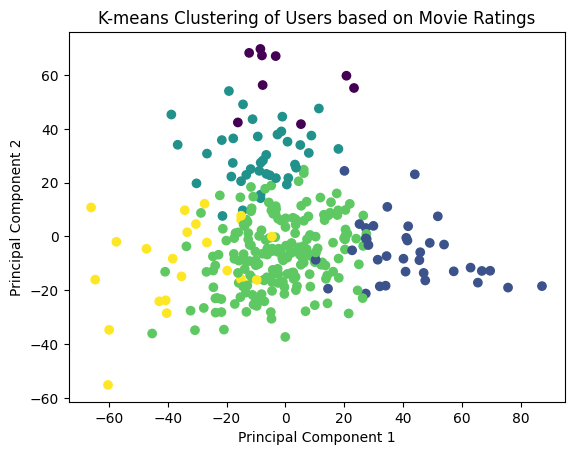

In [106]:
# We will use the k-means again 
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(UC)
UC['community'] = clusters
print(UC['community'].value_counts())
# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(UC)

# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()

In [107]:
# Θα παρουμε την γειτονια του cluster με την μεγαλυτερη πυκνοτητα σε χρηστες
counts = {}
for label in kmeans.labels_:
    if label not in counts:
        counts[label] = 0
    counts[label] += 1
max_cluster = max(counts, key=counts.get)
print("Cluster %d has the most data with %d points." % (max_cluster, counts[max_cluster]))
UC_dense = UC[UC['community'] == max_cluster]
UC_dense

Cluster 3 has the most data with 195 points.


Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9086228,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,cluster,community
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0002746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
ur0035229,0,0,0,0,0,0,10,0,10,0,...,0,0,0,0,0,0,0,0,2,3
ur0068788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
ur0070535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
ur0079652,9,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur96416540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
ur98033888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,2,3
ur98906416,7,4,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,2,3


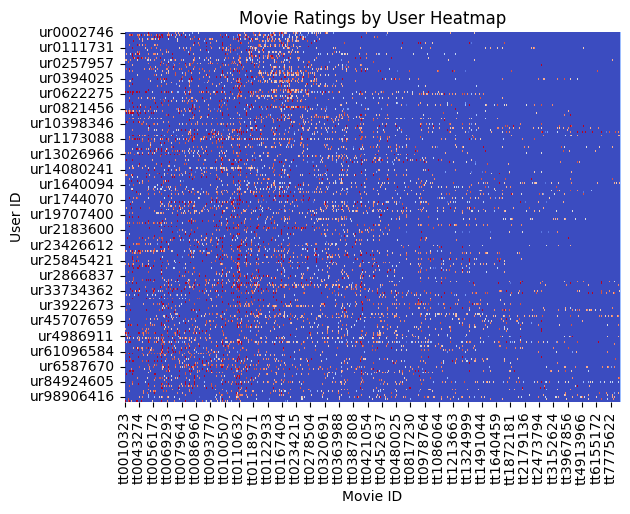

In [108]:
# Θα κανουμε τον πινακα μας πιο πυκνο ωστε να εχουμε λιγοτερα 0

# Make our sparse array more dense 
# Drop all columns where every value is 0 
UC_dense = UC_dense.drop(UC_dense.columns[(UC == 0).all()], axis=1)
# We are ploting a heatmap
sns.heatmap(UC_dense, cmap='coolwarm', cbar=False)
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

### It is clear from the heatmap that users like more the movies on the left side

</br>
</br>

## Τωρα θα κανουμε το ιδιο για τα υπολοιπα clusters

</br>
</br>

## USER GROUP D

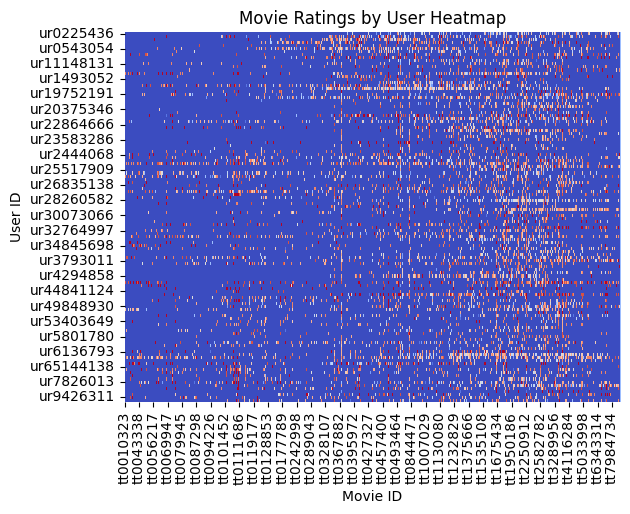

In [109]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UD, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_670662/3049656255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UD['community'] = clusters


0    88
1    27
2     7
Name: community, dtype: int64


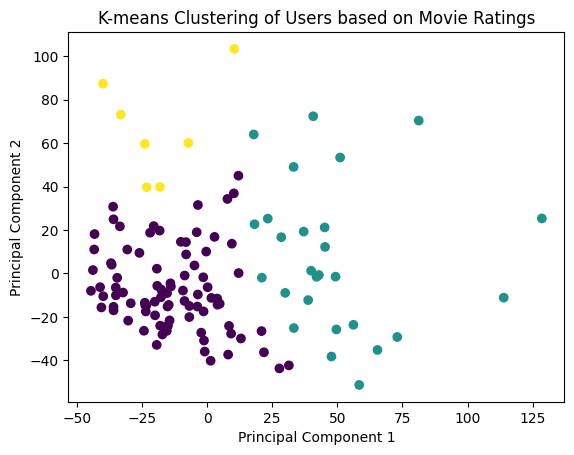

In [110]:
# We will use the k-means again 
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(UD)
UD['community'] = clusters
print(UD['community'].value_counts())
# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(UD)

# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()

In [111]:
# Θα παρουμε την γειτονια του cluster με την μεγαλυτερη πυκνοτητα σε χρηστες
# count the number of points in each cluster
counts = {}
for label in kmeans.labels_:
    if label not in counts:
        counts[label] = 0
    counts[label] += 1
max_cluster = max(counts, key=counts.get)
print("Cluster %d has the most data with %d points." % (max_cluster, counts[max_cluster]))
UD_dense = UD[UD['community'] == max_cluster]
UD_dense

Cluster 0 has the most data with 88 points.


Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,cluster,community
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0225436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur0491610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur0635312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur100116496,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur11059167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur87850731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur90766933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ur91222832,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,3,0


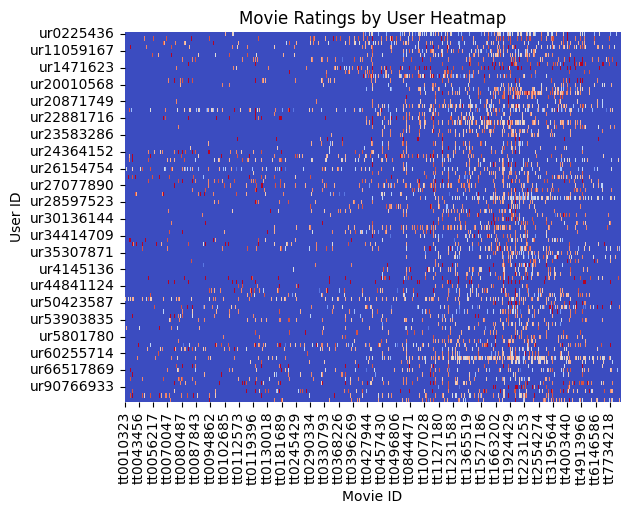

In [112]:
# Θα κανουμε τον πινακα μας πιο πυκνο ωστε να εχουμε λιγοτερα 0


# Make our sparse array more dense 
# Drop all columns where every value is 0 
UD_dense = UD_dense.drop(UD_dense.columns[(UD == 0).all()], axis=1)
# We are ploting a heatmap
sns.heatmap(UD_dense, cmap='coolwarm', cbar=False)
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

## USER GROUP A

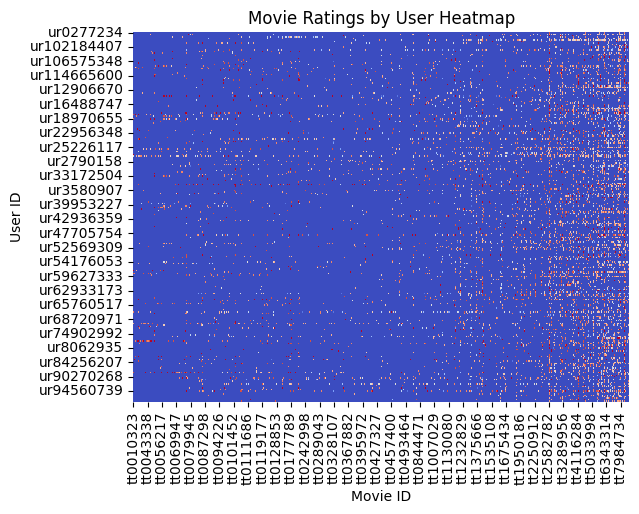

In [113]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UA, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_670662/492115646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UA['community'] = clusters


3    204
0     52
1      1
2      1
Name: community, dtype: int64


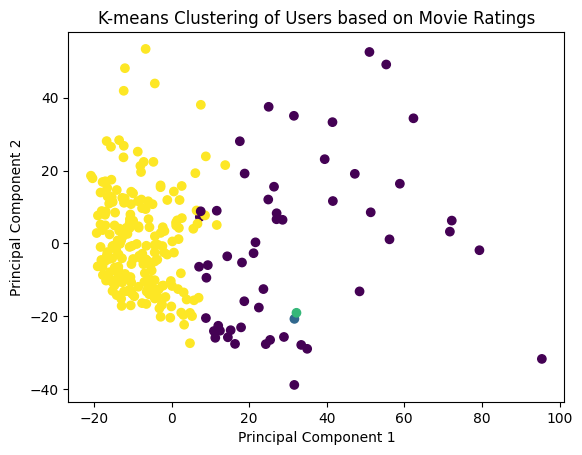

In [114]:
# We will use the k-means again 
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(UA)
UA['community'] = clusters
print(UA['community'].value_counts())
# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(UA)
# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()

In [115]:
# Θα παρουμε την γειτονια του cluster με την μεγαλυτερη πυκνοτητα σε χρηστες
# count the number of points in each cluster
counts = {}
for label in kmeans.labels_:
    if label not in counts:
        counts[label] = 0
    counts[label] += 1
max_cluster = max(counts, key=counts.get)
print("Cluster %d has the most data with %d points." % (max_cluster, counts[max_cluster]))
UA_dense = UA[UA['community'] == max_cluster]
# Drop all columns where every value is 0 
UA_dense = UA_dense.drop(UA_dense.columns[(UA_dense == 0).all()], axis=1)
UA_dense

Cluster 3 has the most data with 204 points.


Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,cluster,community
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0277234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
ur0503545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
ur0609951,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,1,3
ur0879559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,1,3
ur100147162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur94671559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
ur94859844,0,0,0,0,0,0,0,0,0,0,...,5,0,0,9,0,0,3,0,1,3
ur95182476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,8,0,0,1,3


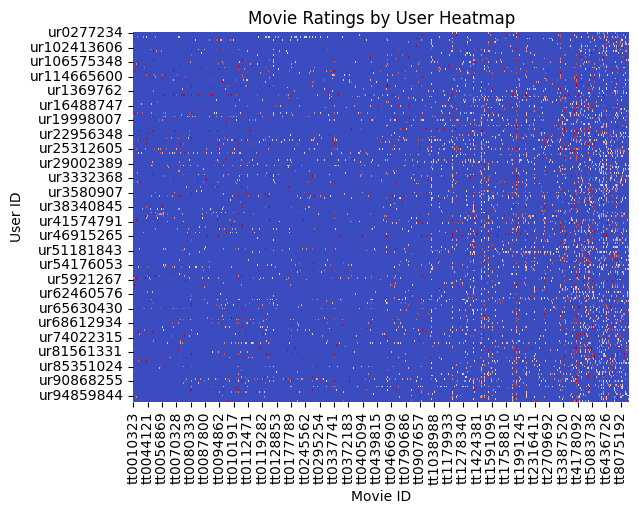

In [116]:
# We are ploting a heatmap
sns.heatmap(UA_dense, cmap='coolwarm', cbar=False)
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

## USER GROUP B

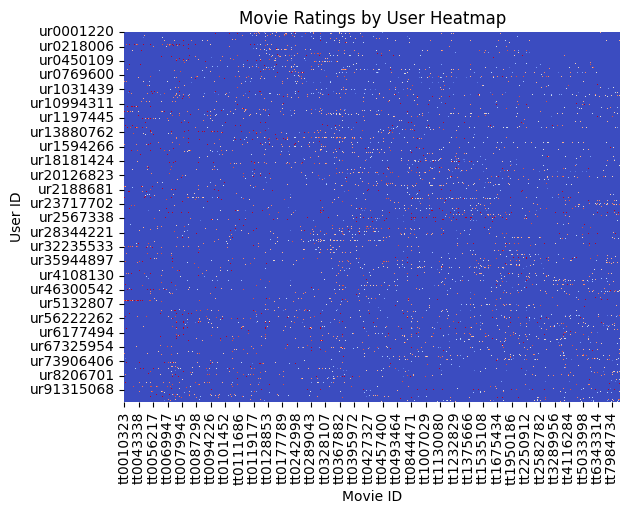

In [117]:
# We are ploting a heatmap but we can't see a lot!
sns.heatmap(UB, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

/home/panos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_670662/496269779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UB['community'] = clusters


3    1501
2     253
0     219
1     184
4     167
Name: community, dtype: int64


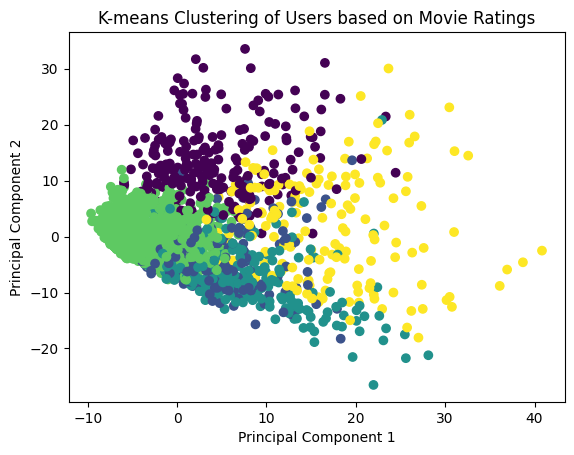

In [118]:
# We will use the k-means again 
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(UB)
UB['community'] = clusters
print(UB['community'].value_counts())
# apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(UB)
# create a scatter plot of the data points colored by cluster
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Users based on Movie Ratings')
plt.show()

In [119]:
# Θα παρουμε την γειτονια του cluster με την μεγαλυτερη πυκνοτητα σε χρηστες
# count the number of points in each cluster
counts = {}
for label in kmeans.labels_:
    if label not in counts:
        counts[label] = 0
    counts[label] += 1
max_cluster = max(counts, key=counts.get)
print("Cluster %d has the most data with %d points." % (max_cluster, counts[max_cluster]))
UB_dense = UB[UB['community'] == max_cluster]
# Drop all columns where every value is 0 
UB_dense = UB_dense.drop(UB_dense.columns[(UB_dense == 0).all()], axis=1)
UB_dense

Cluster 3 has the most data with 1501 points.


Movie_ID,tt0010323,tt0012349,tt0013442,tt0015324,tt0015648,tt0015864,tt0017136,tt0017925,tt0018455,tt0020629,...,tt9086228,tt9139220,tt9173418,tt9214832,tt9243946,tt9484998,tt9495224,tt9619798,tt9777644,community
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0003696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0004646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0010198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0019286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur0033241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur9830389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ur98571307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,7,0,0,7,3
ur99310909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


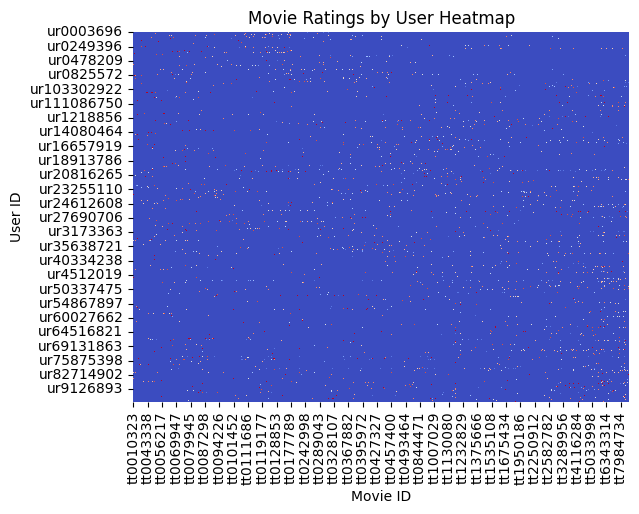

In [120]:
# We are ploting a more dense heatmap
sns.heatmap(UB_dense, cmap='coolwarm', cbar=False)
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')
plt.show()

In [121]:
UA = UA_dense
UB = UB_dense
UC = UC_dense
UD = UD_dense

</br>
</br>

## Αφου κανουμε αυτο θελουμε να προπονησουμε τα νευρωνικα δικτυα για το καθε dense user group 

</br>
</br>

In [122]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

2023-03-22 16:07:39.647855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 16:07:40.171593: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 16:07:40.171644: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 16:07:41.538301: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# First we will build a Neural Network for 1 cluster of users, we will use the MLP architecture

In [123]:
# We will use UD
# We will use the MLP architecture for this
# Split the data into training and testing sets

UD_X_train, UD_X_test, UD_y_train, UD_y_test = train_test_split(UD.iloc[:, :-1], UD.iloc[:, -1], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=UD_X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(UD_X_train, UD_y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
UD_mse = model.evaluate(UD_X_test, UD_y_test, verbose=0)
UD_mae = mean_absolute_error(UD_y_test, model.predict(UD_X_test))
UD_rmse = mean_squared_error(UD_y_test, model.predict(UD_X_test), squared=False)
UD_mape = mean_absolute_percentage_error(UD_y_test, model.predict(UD_X_test))

# Print the results
print('Mean squared error:', UD_mse)
print('Mean absolute error:', UD_mae)
print('Root mean squared error:', UD_rmse)
print('Mean absolute percentage error:', UD_mape)


2023-03-22 16:07:50.271443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 16:07:50.271749: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 16:07:50.271872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-22 16:07:50.271972: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-22 16:07:50.272069: W tensorflow/c

1/1 [==============================] - 0s 16ms/step
Mean squared error: 0.0023517166264355183
Mean absolute error: 0.024822210013452504
Root mean squared error: 0.048494496790184076
Mean absolute percentage error: 111789295767096.89


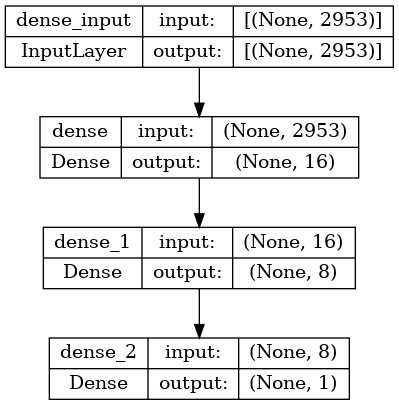

In [124]:
from tensorflow.keras.utils import plot_model

# Generate a plot of the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)

</br>

</br>

## We will create Multilayred Neural Network for all different clusters

</br>

</br>



# UC

In [125]:
UC_X_train, UC_X_test, UC_y_train, UC_y_test = train_test_split(UC.iloc[:, :-1], UC.iloc[:, -1], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=UC_X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(UC_X_train, UC_y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
UC_mse = model.evaluate(UC_X_test, UC_y_test, verbose=0)
UC_mae = mean_absolute_error(UC_y_test, model.predict(UC_X_test))
UC_rmse = mean_squared_error(UC_y_test, model.predict(UC_X_test), squared=False)
UC_mape = mean_absolute_percentage_error(UC_y_test, model.predict(UC_X_test))

# Print the results
print('Mean squared error:', UC_mse)
print('Mean absolute error:', UC_mae)
print('Root mean squared error:', UC_rmse)
print('Mean absolute percentage error:', UC_mape)

2/2 [==============================] - 0s 1ms/step
Mean squared error: 0.6664827466011047
Mean absolute error: 0.6900763236559354
Root mean squared error: 0.8163839303658389
Mean absolute percentage error: 0.2300254412186451


# UB

In [126]:
UB_X_train, UB_X_test, UB_y_train, UB_y_test = train_test_split(UB.iloc[:, :-1], UB.iloc[:, -1], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=UB_X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(UB_X_train, UB_y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
UB_mse = model.evaluate(UB_X_test, UB_y_test, verbose=0)
UB_mae = mean_absolute_error(UB_y_test, model.predict(UB_X_test))
UB_rmse = mean_squared_error(UB_y_test, model.predict(UB_X_test), squared=False)
UB_mape = mean_absolute_percentage_error(UB_y_test, model.predict(UB_X_test))
print('Mean squared error:', UB_mse)
print('Mean absolute error:', UB_mae)
print('Root mean squared error:', UB_rmse)
print('Mean absolute percentage error:', UB_mape)

10/10 [==============================] - 0s 1ms/step
Mean squared error: 0.36619848012924194
Mean absolute error: 0.4656752478640737
Root mean squared error: 0.6051433542913147
Mean absolute percentage error: 0.15522508262135792


# UA

In [127]:
UA_X_train, UA_X_test, UA_y_train, UA_y_test = train_test_split(UA.iloc[:, :-1], UA.iloc[:, -1], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=UA_X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(UA_X_train, UA_y_train, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
UA_mse = model.evaluate(UA_X_test, UA_y_test, verbose=0)
UA_mae = mean_absolute_error(UA_y_test, model.predict(UA_X_test))
UA_rmse = mean_squared_error(UA_y_test, model.predict(UA_X_test), squared=False)
UA_mape = mean_absolute_percentage_error(UA_y_test, model.predict(UA_X_test))

# Print the results
print('Mean squared error:', UA_mse)
print('Mean absolute error:', UA_mae)
print('Root mean squared error:', UA_rmse)
print('Mean absolute percentage error:', UA_mape)

# plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 1ms/step
Mean squared error: 0.4895569384098053
Mean absolute error: 0.5804888853212682
Root mean squared error: 0.6996834644736487
Mean absolute percentage error: 0.19349629510708943


</br>
</br>

## Αξιολογηση ολων των Νευρωνικων ΔΙκτυων 

</br>
</br>

# Evaluations of all our MultiLayered Perceptrons 

## First by MSE (Mean Squared Error)

[0.4895569384098053, 0.36619848012924194, 0.6664827466011047, 0.0023517166264355183]


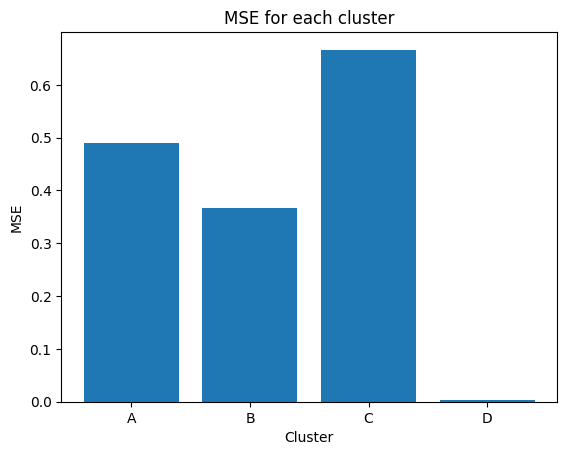

In [128]:
# Calculate the MSE for each cluster
cluster_mses = []
cluster_mses.append(UA_mse)
cluster_mses.append(UB_mse)
cluster_mses.append(UC_mse)
cluster_mses.append(UD_mse)
print(cluster_mses)

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(["A","B","C","D"], cluster_mses)
ax.set_xlabel('Cluster')
ax.set_ylabel('MSE')
ax.set_title('MSE for each cluster')
plt.show()

### Συμπερασμα

</br>
</br>
</br>

<p>Συγκρινοντας τα 4 νευρωνικα φαινεται οτι το cluster D ειχε και το μικροτερο error στο να προβλεπει τα δεδομενα με τιμη σχεδον 0.0023 ενω αντιθετα το cluster C 0.66 ηταν το λιγοτερο accurate </p>

</br>

<p>Αξιζει να σημειωθει οτι και το B που ειναι και αυτο με τα περισσοτερα δεδομενα φαινεται οτι τα πηγε καλα σε σχεση με τα υπολοιπα στο accuracy </p>

</br>

</br>

</br>
</br>
</br>

# MAE (Mean Absolute Error)

[0.5804888853212682, 0.4656752478640737, 0.6900763236559354, 0.024822210013452504]


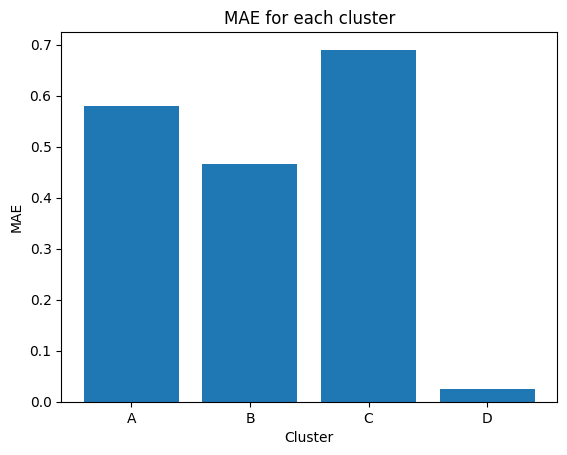

In [129]:
# Calculate the MAE for each cluster
cluster_maes = []
cluster_maes.append(UA_mae)
cluster_maes.append(UB_mae)
cluster_maes.append(UC_mae)
cluster_maes.append(UD_mae)
print(cluster_maes)

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(["A","B","C","D"], cluster_maes)
ax.set_xlabel('Cluster')
ax.set_ylabel('MAE')
ax.set_title('MAE for each cluster')
plt.show()

</br>
</br>
</br>
</br>


# MAPE (Mean Absolute Percentage Error)

[0.19349629510708943, 0.15522508262135792, 0.2300254412186451, 111789295767096.89]


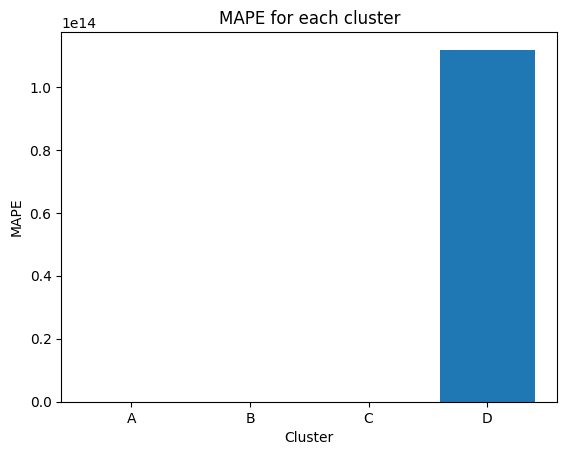

In [130]:
# Calculate the MAE for each cluster
cluster_mape = []
cluster_mape.append(UA_mape)
cluster_mape.append(UB_mape)
cluster_mape.append(UC_mape)
cluster_mape.append(UD_mape)
print(cluster_mape)

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(["A","B","C","D"], cluster_mape)
ax.set_xlabel('Cluster')
ax.set_ylabel('MAPE')
ax.set_title('MAPE for each cluster')
plt.show()

### Συμπερασμα


</br>

</br>
</br>

<p>Συγκρινοντας τα 4 νευρωνικα φαινεται οτι το cluster Β και Α τα πανε καλυτερα. Επισης, παρατηρουμε και μια ασυνηθιστα υψηλη τιμη στο cluster D </p>

</br>

<p>Η τιμη αυτη συνιστα οτι μαλλον υπαρχει καποιο προβλημα με το μοντελο μας, επομενως δεν μπορουμε να το λαβουμε ακομα υποψην σαν ικανοποιητικο μοντελο </p>

</br>

<p>Αξιζει να διευρευνηθει παραπανω ο λογος αυτης της υψηλης τιμης μπορει να ειναι πληθωρα λογων οπως εφαρμογη λαθος αρχιτεκτονικης, μικρο μεγεθος δεδομενων καποια ακραία τιμη στα δεδομενα μας</p>

</br>

</br>
</br>
</br>
</br>



# RMSE (Root Mean Squared Error)

[0.6996834644736487, 0.6051433542913147, 0.8163839303658389, 0.048494496790184076]


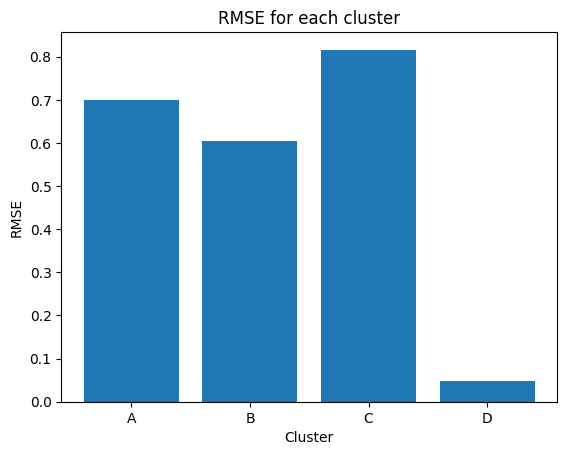

In [131]:
# Calculate the MAE for each cluster
cluster_rmse = []
cluster_rmse.append(UA_rmse)
cluster_rmse.append(UB_rmse)
cluster_rmse.append(UC_rmse)
cluster_rmse.append(UD_rmse)
print(cluster_rmse)

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(["A","B","C","D"], cluster_rmse)
ax.set_xlabel('Cluster')
ax.set_ylabel('RMSE')
ax.set_title('RMSE for each cluster')
plt.show()

### Συμπερασμα




</br>

<p>Συγκρινοντας τα 4 νευρωνικα φαινεται οτι το cluster A και B τα πανε καλυτερα καθως εχουν το lowest RMSE ενω ταυτοχρονα το υψηλοτερο MAPE.  </p>


</br>


<p>Με το Β να φαινεται το καλυτερα προπονημενο το οποιο φαινεται λογικο οταν λαβουμε υποψην οτι ειχε και τα περισσοτερα δεδομενα.  </p>


</br>

<p>Αντιθετα ενω το D φαινοταν να ειναι το πιο accurate ειναι πολυ πιθανο τα αποτελεσματα μας να μην ειναι ακομα αξιοπιστα</p>


</br>

<p>Παρολα αυτα,αξιζει να σημειωθει, χρειαζονται και αλλες μεταβλητες για να αξιολογησουμε ενα μοντελο οπως η πολυπλοκοτητα, το υπολογιστικο κοστος, η ποιοτητα και το μεγεθος των των δεδομενων</p>

</br>